# Introduction
In this notebook, we will be discussing the relationship between Educational Attainment (2014-2018) and Household Income (2018) for Los Angeles County.

We will begin by importing Census data found on Social Explorer for Educational Attainment (2014-2018) and Household Income (2018) for LA County.

In [1]:
import pandas as pd

In [2]:
education = pd.read_csv('data/Educational_Attainment.csv')

Next, we will inspect the data. We will be looking at the shape, first few rows of the dataset, and a sample of the dataset.

In [3]:
education.shape

(2346, 70)

In [4]:
education.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,6037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,6037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,6037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,6037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,6037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


In [5]:
education.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
1079,6037401202,14000US06037401202,Census Tract 4012.02,"Census Tract 4012.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4949,NaN,...,216,8,49,11.94,21.25,39.56,18.98,6.55,0.24,1.49


Now, we want to look at the different data types in our dataset.

In [6]:
education.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   int64  
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

# Fixing the Leading Zero Dilemma
Next, we will be taking a look at the column that will become Geo_FIPS. We also want to fix the leading zero dilemma by coding the leading "0" in the Geo_FIPS code.

In [7]:
education.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101210
3    6037101220
4    6037101300
Name: Geo_FIPS, dtype: int64

In [8]:
education.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [9]:
education.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

We will fix the leading zero error by re-importing the data and specifying the FIPS column as a string. We will also check our work with the .head() code.

In [10]:
education = pd.read_csv(
    'data/Educational_Attainment.csv',
    dtype={'Geo_FIPS':str})

In [11]:
education['Geo_FIPS'] = education['Geo_FIPS'].str.zfill(11)
education.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


We can confirm our new dataframe with the correct datatypes.

In [12]:
education.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

# Dropping Null Columns
Next, we would like to drop all null columns in our dataset. This includes all empty values.

In [13]:
education.columns[education.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [14]:
education = education.dropna(axis=1,how="all")

In [15]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_STATE          2346 non-null   int64  
 10  Geo_COUNTY         2346 non-null   int64  
 11  Geo_TRACT          2346 non-null   int64  
 12  SE_A12001_001      2346 non-null   int64  
 13  SE_A12001_002      2346 non-null   int64  
 14  SE_A12001_003      2346 non-null   int64  
 15  SE_A12001_004      2346 non-null   int64  
 16  SE_A12001_005      2346 

We re-inspect the data.

In [16]:
education.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,6,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,6,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,6,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


Now that we have dropped the columns with empty values, we can go ahead and elimnate columns that we do not need. We begin by listing the columns we do not need.

In [17]:
columns_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO']

Then we can drop them and check if they are dropped with .head().

In [18]:
education = education.drop(columns_to_drop,axis=1)
education.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,3085,524,765,1101,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,2597,168,749,888,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,4107,762,1185,1340,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,2484,515,700,769,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,3446,362,949,1145,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


# Renaming Columns.
In order to rename our columns, we begin by listing the columns by the names they currently have.

In [19]:
columns = list(education)
columns

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A12001_001',
 'SE_A12001_002',
 'SE_A12001_003',
 'SE_A12001_004',
 'SE_A12001_005',
 'SE_A12001_006',
 'SE_A12001_007',
 'SE_A12001_008',
 'PCT_SE_A12001_002',
 'PCT_SE_A12001_003',
 'PCT_SE_A12001_004',
 'PCT_SE_A12001_005',
 'PCT_SE_A12001_006',
 'PCT_SE_A12001_007',
 'PCT_SE_A12001_008']

We then create an output with the column names we want.

In [20]:
education.columns = ['FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'PopOver25yrs',
 'Less_Than_HS',
 'HS_Graduate',
 'Some_College',
 'Bachelors_Degree',
 'Masters_Degree',
 'Prof_School_Degree',
 'Doctorate_Degree',
 'PCT_Less_Than_HS',
 'PCT_HS_Graduate',
 'PCT_Some_College',
 'PCT_Bachelors_Degree',
 'PCT_Masters_Degree',
 'PCT_Prof_School_Degree',
 'PCT_Doctorate_Degree']

We check to make sure the column names have been changed.

In [21]:
education.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,PopOver25yrs,Less_Than_HS,HS_Graduate,Some_College,...,Masters_Degree,Prof_School_Degree,Doctorate_Degree,PCT_Less_Than_HS,PCT_HS_Graduate,PCT_Some_College,PCT_Bachelors_Degree,PCT_Masters_Degree,PCT_Prof_School_Degree,PCT_Doctorate_Degree
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,3085,524,765,1101,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,2597,168,749,888,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,4107,762,1185,1340,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,2484,515,700,769,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,3446,362,949,1145,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


# Simple Statistics and Plots
Now, we can look at simple statistics of our dataset and begin creating plots.

Here, we can look at basic statistics of the Population over 25 years old in LA county.

In [22]:
education['PopOver25yrs'].head()

0    3085
1    2597
2    4107
3    2484
4    3446
Name: PopOver25yrs, dtype: int64

In [23]:
education['PopOver25yrs'].mean()

2917.940750213129

In [24]:
education['PopOver25yrs'].describe()

count    2346.000000
mean     2917.940750
std      1101.241175
min         0.000000
25%      2194.250000
50%      2819.000000
75%      3611.500000
max      8196.000000
Name: PopOver25yrs, dtype: float64

We will plot a histogram of the Population Over 25 years old in LA County.

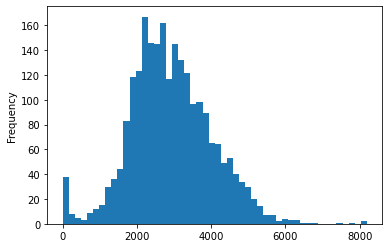

In [25]:
education['PopOver25yrs'].plot.hist(bins=50)

Now that we have looked at some basic statistics, let's look at factors that are more relevant to our research question. We want to find an association between the level of education and household income. Does higher education result in higher household income? 

We will be looking at the census tracts with the highest population of people with Bachelor's Degrees in LA. We start by sorting the data by their respective columns.

In [26]:
education_sorted = education.sort_values(by='Bachelors_Degree', ascending = False)

In [27]:
education_sorted[['Geo_NAME','Bachelors_Degree']].head(10)

,Geo_NAME,Bachelors_Degree
2146,Census Tract 7029.01,3586
2106,Census Tract 7002,3203
922,Census Tract 2756.02,3012
2047,Census Tract 6211.04,2912
2107,Census Tract 7003,2659
2070,Census Tract 6508,2377
1937,Census Tract 5776.03,2359
2133,Census Tract 7020.02,2333
2166,Census Tract 8004.08,2245
2121,Census Tract 7013.02,2244


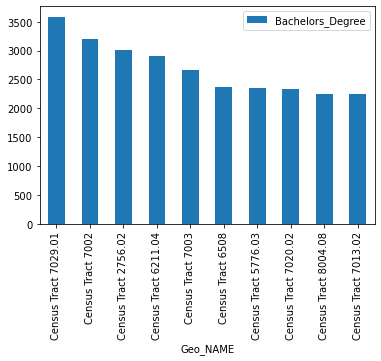

In [28]:
education_sorted.head(10).plot.bar(x='Geo_NAME',
                                   y='Bachelors_Degree')

The chart below shows the Top 10 Census Tracts with the Highest Population in LA County with Bachelor's Degrees.

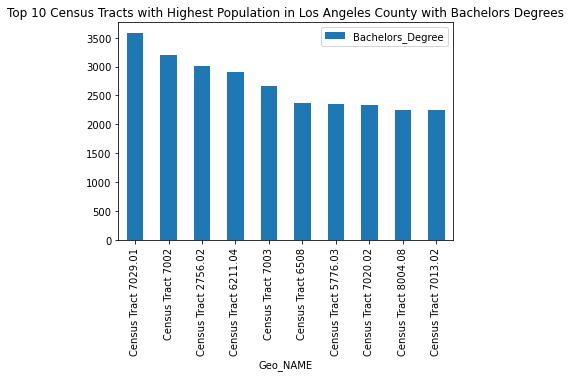

In [29]:
education_sorted.head(10).plot.bar(x='Geo_NAME',
                                  y='Bachelors_Degree',
                                  title='Top 10 Census Tracts with Highest Population in Los Angeles County with Bachelors Degrees')

Next, let's look at the census tracts that have no people with Bachelors Degrees in them.

In [30]:
education_no_pop = education[education['Bachelors_Degree']==0]

In [31]:
print('There are ' +str(len(education_no_pop)) + ' census tracts wsith no people in them')

There are 26 census tracts wsith no people in them


In [32]:
education_no_pop[['Geo_NAME','Bachelors_Degree']]

,Geo_NAME,Bachelors_Degree
1054,Census Tract 3200,0
1521,Census Tract 5041.02,0
1746,Census Tract 5516,0
1905,Census Tract 5755,0
2317,Census Tract 9800.01,0
2318,Census Tract 9800.02,0
2319,Census Tract 9800.03,0
2320,Census Tract 9800.04,0
2321,Census Tract 9800.05,0
2322,Census Tract 9800.06,0


Let's find out how many census tracts have 50% or more people with Bachelor's Degrees.

In [33]:
bachelors50 = education[education['PCT_Bachelors_Degree']>=50]
bachelors50[['Geo_NAME','PCT_Bachelors_Degree']]

,Geo_NAME,PCT_Bachelors_Degree
348,Census Tract 1436.04,53.86
630,Census Tract 2148,53.74
633,Census Tract 2151.01,59.09
637,Census Tract 2163,50.71
700,Census Tract 2247,50.76
862,Census Tract 2674.03,52.36
2044,Census Tract 6210.02,55.59
2045,Census Tract 6210.04,54.26
2047,Census Tract 6211.04,50.95
2121,Census Tract 7013.02,54.63


# Creating Maps
As we begin mapping our dataset, we will be using a geojson file downloaded from the LA Times.

In [34]:
import geopandas as gpd

In [35]:
tracts=gpd.read_file('../../data/la_tracts.geojson')
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


We will look at the details of the dataset, and then we will subset the data.

In [36]:
tracts.info(verbose=True,null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   kind          2346 non-null   object  
 1   external_id   2346 non-null   object  
 2   name          2346 non-null   object  
 3   slug          2346 non-null   object  
 4   set           2346 non-null   object  
 5   metadata      2346 non-null   object  
 6   resource_uri  2346 non-null   object  
 7   geometry      2346 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 146.8+ KB


In [37]:
tracts = tracts[['name','geometry']]
tracts.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


Rename the columns.

In [38]:
tracts.columns = ['FIPS','geometry']

In [39]:
tracts.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


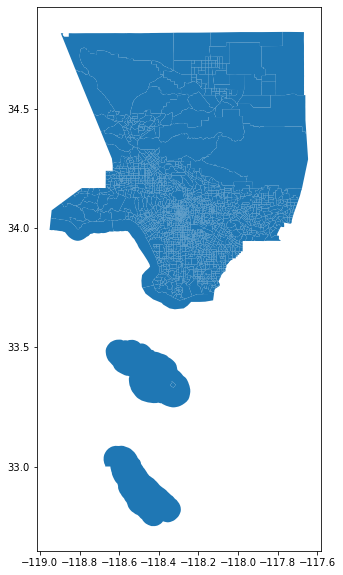

In [40]:
tracts.plot(figsize=(12,10))

Now, we will be merging our data from social explorer with the geojson file.

In [41]:
tracts_education=tracts.merge(education,on="FIPS")

In [42]:
tracts_education.head()

,FIPS,geometry,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,PopOver25yrs,Less_Than_HS,HS_Graduate,...,Masters_Degree,Prof_School_Degree,Doctorate_Degree,PCT_Less_Than_HS,PCT_HS_Graduate,PCT_Some_College,PCT_Bachelors_Degree,PCT_Masters_Degree,PCT_Prof_School_Degree,PCT_Doctorate_Degree
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,3085,524,765,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,2597,168,749,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,4107,762,1185,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,2484,515,700,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,3446,362,949,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


Now we will produce a map using a Natural Break scheme to represent the distribution of percentage of Bachelor's Degrees across LA County.

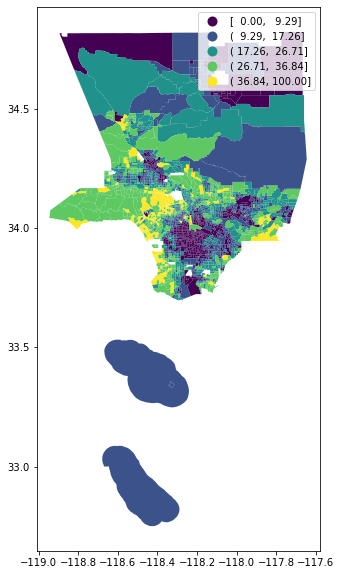

In [43]:
tracts_education.plot(figsize=(12,10),
                 column='PCT_Bachelors_Degree',
                 legend=True, 
                 scheme='NaturalBreaks')

# The following section repeats the same process conducted to highlight Education Attainment (2014-2018) in Los Angeles County above. This section is specific to Household Income (2018) in Los Angeles County and is also based on data downloaded from Social Explorer.

In [44]:
import pandas as pd

In [45]:
HI = pd.read_csv('data/Household Income LA County (2018).csv') 
#This command prompt loads the Social Explorer data file on Household Income in LA County into Jupyter Hub.

In [46]:
HI.shape

(2346, 88)

In [47]:
HI.head

<bound method NDFrame.head of         Geo_FIPS           Geo_GEOID              Geo_NAME  \
0     6037101110  14000US06037101110  Census Tract 1011.10   
1     6037101122  14000US06037101122  Census Tract 1011.22   
2     6037101210  14000US06037101210  Census Tract 1012.10   
3     6037101220  14000US06037101220  Census Tract 1012.20   
4     6037101300  14000US06037101300     Census Tract 1013   
...          ...                 ...                   ...   
2341  6037980031  14000US06037980031  Census Tract 9800.31   
2342  6037980033  14000US06037980033  Census Tract 9800.33   
2343  6037990100  14000US06037990100     Census Tract 9901   
2344  6037990200  14000US06037990200     Census Tract 9902   
2345  6037990300  14000US06037990300     Census Tract 9903   

                                              Geo_QName Geo_STUSAB  \
0     Census Tract 1011.10, Los Angeles County, Cali...         ca   
1     Census Tract 1011.22, Los Angeles County, Cali...         ca   
2     Census Tr

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#This code is to overwrite the default display settings and show the entire table rather than the first and last 10 columns.

In [49]:
HI.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
142,6037120030,14000US06037120030,Census Tract 1200.30,"Census Tract 1200.30, Los Angeles County, Cali...",ca,140,0,ACSSF,4012,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,120030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,740,74,99,106,27,101,25,18,31,32,64,27,84,42,0,4,6,10.0,13.38,14.32,3.65,13.65,3.38,2.43,4.19,4.32,8.65,3.65,11.35,5.68,0.0,0.54,0.81


In [50]:
HI.info(verbose=True, null_counts=True)
#This allows you to look at the data types for each of the columns in your dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   int64  
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

In [51]:
HI.Geo_FIPS.head()
#This allows you to see the datatype for the Geo_FIPS column and to view the contents of the column. 

0    6037101110
1    6037101122
2    6037101210
3    6037101220
4    6037101300
Name: Geo_FIPS, dtype: int64

In [52]:
HI.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

In [53]:
HI.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [54]:
HI.info(verbose=True, null_counts=True)
#This allows you to view your dataframe and ensure that you have the correct datatypes. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   int64  
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

In [55]:
HI = pd.read_csv( 'data/Household Income LA County (2018).csv', dtype={'Geo_FIPS':str})
#This allows you to change the data type of the Geo_FIPS column

In [56]:
HI['Geo_FIPS'] = HI['Geo_FIPS'].str.zfill(11)
HI.head()
#The leading zero in front of the Geo_FIPS column is needed to properly map and analyze the data. 

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1596,110,97,70,76,123,96,54,78,88,64,126,277,91,93,109,44,6.89,6.08,4.39,4.76,7.71,6.02,3.38,4.89,5.51,4.01,7.89,17.36,5.70,5.83,6.83,2.76
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,52,18,0,15,39,38,7,40,23,62,186,232,114,105,133,192,4.14,1.43,0.00,1.19,3.11,3.03,0.56,3.18,1.83,4.94,14.81,18.47,9.08,8.36,10.59,15.29
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,101210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2321,285,140,335,69,223,145,61,95,220,128,147,225,96,67,14,71,12.28,6.03,14.43,2.97,9.61,6.25,2.63,4.09,9.48,5.51,6.33,9.69,4.14,2.89,0.60,3.06
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1294,65,104,160,56,22,133,60,118,123,53,75,88,110,45,43,39,5.02,8.04,12.36,4.33,1.70,10.28,4.64,9.12,9.51,4.10,5.80,6.80,8.50,3.48,3.32,3.01
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,101300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435,75,14,69,36,29,23,18,123,49,87,80,200,146,107,195,184,5.23,0.98,4.81,2.51,2.02,1.60,1.25,8.57,3.41,6.06,5.57,13.94,10.17,7.46,13.59,12.82


In [57]:
HI.columns[HI.isna().all()].tolist()
# This provides you with a list of all the columns that have all empty values (null columns). 

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [59]:
HI = HI.dropna(axis=1,how="all")
#This command allows you to drop all the columns with empty values. 

In [60]:
HI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_STATE          2346 non-null   int64  
 10  Geo_COUNTY         2346 non-null   int64  
 11  Geo_TRACT          2346 non-null   int64  
 12  SE_A14001_001      2346 non-null   int64  
 13  SE_A14001_002      2346 non-null   int64  
 14  SE_A14001_003      2346 non-null   int64  
 15  SE_A14001_004      2346 non-null   int64  
 16  SE_A14001_005      2346 

In [61]:
HI.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,6,37,101110,1596,110,97,70,76,123,96,54,78,88,64,126,277,91,93,109,44,6.89,6.08,4.39,4.76,7.71,6.02,3.38,4.89,5.51,4.01,7.89,17.36,5.70,5.83,6.83,2.76
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,37,101122,1256,52,18,0,15,39,38,7,40,23,62,186,232,114,105,133,192,4.14,1.43,0.00,1.19,3.11,3.03,0.56,3.18,1.83,4.94,14.81,18.47,9.08,8.36,10.59,15.29
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,6,37,101210,2321,285,140,335,69,223,145,61,95,220,128,147,225,96,67,14,71,12.28,6.03,14.43,2.97,9.61,6.25,2.63,4.09,9.48,5.51,6.33,9.69,4.14,2.89,0.60,3.06
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,37,101220,1294,65,104,160,56,22,133,60,118,123,53,75,88,110,45,43,39,5.02,8.04,12.36,4.33,1.70,10.28,4.64,9.12,9.51,4.10,5.80,6.80,8.50,3.48,3.32,3.01
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,6,37,101300,1435,75,14,69,36,29,23,18,123,49,87,80,200,146,107,195,184,5.23,0.98,4.81,2.51,2.02,1.60,1.25,8.57,3.41,6.06,5.57,13.94,10.17,7.46,13.59,12.82


In [62]:
columns_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO']
#This allows you to create a list of the columns you want to drop from your table

In [63]:
HI = HI.drop(columns_to_drop,axis=1)
HI.head()
#After setting which columns to drop, you then actually drop them and can reinspect the table using the .head() command. 

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,1596,110,97,70,76,123,96,54,78,88,64,126,277,91,93,109,44,6.89,6.08,4.39,4.76,7.71,6.02,3.38,4.89,5.51,4.01,7.89,17.36,5.70,5.83,6.83,2.76
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,1256,52,18,0,15,39,38,7,40,23,62,186,232,114,105,133,192,4.14,1.43,0.00,1.19,3.11,3.03,0.56,3.18,1.83,4.94,14.81,18.47,9.08,8.36,10.59,15.29
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,2321,285,140,335,69,223,145,61,95,220,128,147,225,96,67,14,71,12.28,6.03,14.43,2.97,9.61,6.25,2.63,4.09,9.48,5.51,6.33,9.69,4.14,2.89,0.60,3.06
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,1294,65,104,160,56,22,133,60,118,123,53,75,88,110,45,43,39,5.02,8.04,12.36,4.33,1.70,10.28,4.64,9.12,9.51,4.10,5.80,6.80,8.50,3.48,3.32,3.01
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,1435,75,14,69,36,29,23,18,123,49,87,80,200,146,107,195,184,5.23,0.98,4.81,2.51,2.02,1.60,1.25,8.57,3.41,6.06,5.57,13.94,10.17,7.46,13.59,12.82


In [64]:
columns = list(HI)
columns

#This command provides a list of the columns in the dataframe. 

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A14001_001',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017',
 'PCT_SE_A14001_002',
 'PCT_SE_A14001_003',
 'PCT_SE_A14001_004',
 'PCT_SE_A14001_005',
 'PCT_SE_A14001_006',
 'PCT_SE_A14001_007',
 'PCT_SE_A14001_008',
 'PCT_SE_A14001_009',
 'PCT_SE_A14001_010',
 'PCT_SE_A14001_011',
 'PCT_SE_A14001_012',
 'PCT_SE_A14001_013',
 'PCT_SE_A14001_014',
 'PCT_SE_A14001_015',
 'PCT_SE_A14001_016',
 'PCT_SE_A14001_017']

In [65]:
HI.columns = ['FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Households',              
 'Households: Less than $10,000',
 'Households: $10,000 to $14,999',
 'Households: $15,000 to $19,999',
 'Households: $20,000 to $24,999',
 'Households: $25,000 to $29,999',
 'Households: $30,000 to $34,999',
 'Households: $35,000 to $39,999',
 'Households: $40,000 to $44,999',
 'Households: $45,000 to $49,999',
 'Households: $50,000 to $59,999',
 'Households: $60,000 to $74,999',
 'Households: $75,000 to $99,999',
 'Households: $100,000 to $124,999',
 'Households: $125,000 to $149,999',
 'Households: $150,000 to $199,999',
 'Households: $200,000 or More', 
 'Percent Households: Less than $10,000',
 'Percent Households: $10,000 to $14,999',
 'Percent Households: $15,000 to $19,999',
 'Percent Households: $20,000 to $24,999',
 'Percent Households: $25,000 to $29,999',
 'Percent Households: $30,000 to $34,999',
 'Percent Households: $35,000 to $39,999',
 'Percent Households: $40,000 to $44,999',
 'Percent Households: $45,000 to $49,999',
 'Percent Households: $50,000 to $59,999',
 'Percent Households: $60,000 to $74,999',
 'Percent Households: $75,000 to $99,999',
 'Percent Households: $100,000 to $124,999',
 'Percent Households: $125,000 to $149,999',
 'Percent Households: $150,000 to $199,999',
 'Percent Households: $200,000 or More']

#This method allows you to rename each of the columns in the dataset. The columns are renamed here to correspond with how they are defined in the data dictionary file from Social Explorer.

In [66]:
HI.head()
# The renamed columns of the data file are visible by reinspecting the data.

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Households,"Households: Less than $10,000","Households: $10,000 to $14,999","Households: $15,000 to $19,999","Households: $20,000 to $24,999","Households: $25,000 to $29,999","Households: $30,000 to $34,999","Households: $35,000 to $39,999","Households: $40,000 to $44,999","Households: $45,000 to $49,999","Households: $50,000 to $59,999","Households: $60,000 to $74,999","Households: $75,000 to $99,999","Households: $100,000 to $124,999","Households: $125,000 to $149,999","Households: $150,000 to $199,999","Households: $200,000 or More","Percent Households: Less than $10,000","Percent Households: $10,000 to $14,999","Percent Households: $15,000 to $19,999","Percent Households: $20,000 to $24,999","Percent Households: $25,000 to $29,999","Percent Households: $30,000 to $34,999","Percent Households: $35,000 to $39,999","Percent Households: $40,000 to $44,999","Percent Households: $45,000 to $49,999","Percent Households: $50,000 to $59,999","Percent Households: $60,000 to $74,999","Percent Households: $75,000 to $99,999","Percent Households: $100,000 to $124,999","Percent Households: $125,000 to $149,999","Percent Households: $150,000 to $199,999","Percent Households: $200,000 or More"
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,1596,110,97,70,76,123,96,54,78,88,64,126,277,91,93,109,44,6.89,6.08,4.39,4.76,7.71,6.02,3.38,4.89,5.51,4.01,7.89,17.36,5.70,5.83,6.83,2.76
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,1256,52,18,0,15,39,38,7,40,23,62,186,232,114,105,133,192,4.14,1.43,0.00,1.19,3.11,3.03,0.56,3.18,1.83,4.94,14.81,18.47,9.08,8.36,10.59,15.29
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,2321,285,140,335,69,223,145,61,95,220,128,147,225,96,67,14,71,12.28,6.03,14.43,2.97,9.61,6.25,2.63,4.09,9.48,5.51,6.33,9.69,4.14,2.89,0.60,3.06
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,1294,65,104,160,56,22,133,60,118,123,53,75,88,110,45,43,39,5.02,8.04,12.36,4.33,1.70,10.28,4.64,9.12,9.51,4.10,5.80,6.80,8.50,3.48,3.32,3.01
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,1435,75,14,69,36,29,23,18,123,49,87,80,200,146,107,195,184,5.23,0.98,4.81,2.51,2.02,1.60,1.25,8.57,3.41,6.06,5.57,13.94,10.17,7.46,13.59,12.82


In [67]:
HI['Households'].head()
#This allows you to inspect a specific column. In this case the number of households per census tract in Los Angeles county is measured. 

0    1596
1    1256
2    2321
3    1294
4    1435
Name: Households, dtype: int64

In [68]:
HI['Households'].describe()
#This provides you with some common statistics regarding the number of households in Los Angeles County. 

count    2346.000000
mean     1409.253623
std       611.413435
min         0.000000
25%      1012.000000
50%      1331.500000
75%      1718.500000
max      5477.000000
Name: Households, dtype: float64

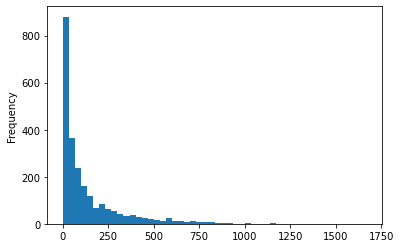

In [69]:
HI['Households: $200,000 or More'].plot.hist(bins=50)
#This allows you create a histogram with the distribution of households in Los Angeles County making $200,000 or more. 

In [70]:
HI_sorted = HI.sort_values(by='Households: $200,000 or More',ascending = False)

#This command is used to sort the number of households making $200,000 or more in Los Angeles County by Census tract from highest to lowest

In [71]:
HI_sorted[['Geo_NAME','Households: $200,000 or More']].head(10)
#This allows you to view the top ten census tracts with households generating $200,000 or more in income. 

,Geo_NAME,"Households: $200,000 or More"
922,Census Tract 2756.02,1670
835,Census Tract 2626.04,1344
326,Census Tract 1397.02,1184
2047,Census Tract 6211.04,1165
2166,Census Tract 8004.08,1163
2146,Census Tract 7029.01,1030
1388,Census Tract 4641,1019
2103,Census Tract 6707.02,1015
2040,Census Tract 6208,1000
828,Census Tract 2622,924


In [72]:
education_sorted[['Geo_NAME','Bachelors_Degree']].head(10)
# Here we bring back the top 10 census tracts with bachelor's degrees in order to see the relationship between census tracts having a high number of bachelors degrees and having a higher number of households with income over 200,000 dollars. 

,Geo_NAME,Bachelors_Degree
2146,Census Tract 7029.01,3586
2106,Census Tract 7002,3203
922,Census Tract 2756.02,3012
2047,Census Tract 6211.04,2912
2107,Census Tract 7003,2659
2070,Census Tract 6508,2377
1937,Census Tract 5776.03,2359
2133,Census Tract 7020.02,2333
2166,Census Tract 8004.08,2245
2121,Census Tract 7013.02,2244


# Education and Household Income Overlap. 

There appears to be a similarity between some of the census tracts with a household income of 200,000 dollars or higher and  census tracts with higher levels of bachelor's degrees present. Of the top 10 census tracts with households making  200,000 dollars or more, 4 overlap with the top 10 census tracts with the highest number of individuals holding bachelor's degrees. This includes the following census tracts: 2756.02, 6211.04, 8004.08, 7029.01.   

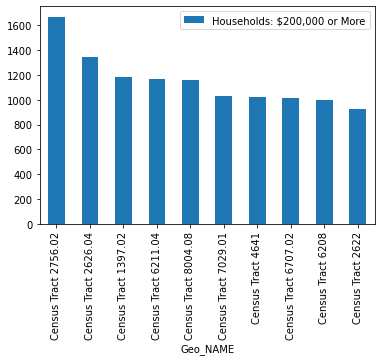

In [73]:
HI_sorted.head(10).plot.bar(x='Geo_NAME',
                            y='Households: $200,000 or More')
#This allows you to plot a bar graph for the census tracts with households making 200,000 or more. 

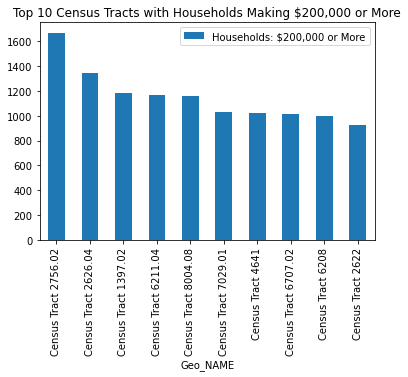

In [74]:
HI_sorted.head(10).plot.bar(x='Geo_NAME',
                            y='Households: $200,000 or More',
                            title = 'Top 10 Census Tracts with Households Making $200,000 or More')

#This command allows you to put a title on the bar plot created in the previous cell. 

In [75]:
HI[HI['Households']==0]
#This command allows you to view the census tracts that have no households in them. 

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Households,"Households: Less than $10,000","Households: $10,000 to $14,999","Households: $15,000 to $19,999","Households: $20,000 to $24,999","Households: $25,000 to $29,999","Households: $30,000 to $34,999","Households: $35,000 to $39,999","Households: $40,000 to $44,999","Households: $45,000 to $49,999","Households: $50,000 to $59,999","Households: $60,000 to $74,999","Households: $75,000 to $99,999","Households: $100,000 to $124,999","Households: $125,000 to $149,999","Households: $150,000 to $199,999","Households: $200,000 or More","Percent Households: Less than $10,000","Percent Households: $10,000 to $14,999","Percent Households: $15,000 to $19,999","Percent Households: $20,000 to $24,999","Percent Households: $25,000 to $29,999","Percent Households: $30,000 to $34,999","Percent Households: $35,000 to $39,999","Percent Households: $40,000 to $44,999","Percent Households: $45,000 to $49,999","Percent Households: $50,000 to $59,999","Percent Households: $60,000 to $74,999","Percent Households: $75,000 to $99,999","Percent Households: $100,000 to $124,999","Percent Households: $125,000 to $149,999","Percent Households: $150,000 to $199,999","Percent Households: $200,000 or More"
847,06037265301,Census Tract 2653.01,"Census Tract 2653.01, Los Angeles County, Cali...",6,37,265301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,06037320000,Census Tract 3200,"Census Tract 3200, Los Angeles County, California",6,37,320000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122,06037403200,Census Tract 4032,"Census Tract 4032, Los Angeles County, California",6,37,403200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1746,06037551600,Census Tract 5516,"Census Tract 5516, Los Angeles County, California",6,37,551600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,06037574601,Census Tract 5746.01,"Census Tract 5746.01, Los Angeles County, Cali...",6,37,574601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,06037574700,Census Tract 5747,"Census Tract 5747, Los Angeles County, California",6,37,574700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2196,06037901003,Census Tract 9010.03,"Census Tract 9010.03, Los Angeles County, Cali...",6,37,901003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2297,06037920200,Census Tract 9202,"Census Tract 9202, Los Angeles County, California",6,37,920200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2317,06037980001,Census Tract 9800.01,"Census Tract 9800.01, Los Angeles County, Cali...",6,37,980001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2318,06037980002,Census Tract 9800.02,"Census Tract 9800.02, Los Angeles County, Cali...",6,37,980002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
HI_no_house = HI[HI['Households']==0]

In [77]:
print('There are ' + str(len(HI_no_house)) + ' census tracts with no households in them')

There are 27 census tracts with no households in them


In [78]:
HI_no_house[['Geo_NAME', 'Households']]
#This provides a list of the census tracts with 0 households in them. 

,Geo_NAME,Households
847,Census Tract 2653.01,0
1054,Census Tract 3200,0
1122,Census Tract 4032,0
1746,Census Tract 5516,0
1889,Census Tract 5746.01,0
1891,Census Tract 5747,0
2196,Census Tract 9010.03,0
2297,Census Tract 9202,0
2317,Census Tract 9800.01,0
2318,Census Tract 9800.02,0


In [79]:
house200k = HI[HI['Percent Households: $200,000 or More']>=50]
house200k[['Geo_NAME', 'Percent Households: $200,000 or More']].sort_values(by='Percent Households: $200,000 or More', ascending=False)

#Here we are looking at census tracts where the percent of households making 200,000 or more is greater than 50%. 


,Geo_NAME,"Percent Households: $200,000 or More"
832,Census Tract 2624,63.22
824,Census Tract 2611.01,59.32
838,Census Tract 2628.02,58.54
2100,Census Tract 6705,58.04
831,Census Tract 2623.03,56.71
829,Census Tract 2623.01,54.34
2331,Census Tract 9800.19,54.29
326,Census Tract 1397.02,53.82
837,Census Tract 2627.06,53.56
834,Census Tract 2626.01,53.13


# Household Income Map 

Now that we have analyzed some data for household income in Los Angeles County, we can create a map to better visualize it.The same method used for creating the map of educational attainment above is used here. 

In [80]:
import geopandas as gpd

In [81]:
tracts=gpd.read_file('../../data/la_tracts.geojson')
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [82]:
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   kind          2346 non-null   object  
 1   external_id   2346 non-null   object  
 2   name          2346 non-null   object  
 3   slug          2346 non-null   object  
 4   set           2346 non-null   object  
 5   metadata      2346 non-null   object  
 6   resource_uri  2346 non-null   object  
 7   geometry      2346 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 146.8+ KB


In [83]:
tracts = tracts[['name','geometry']]
tracts.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [84]:
tracts.columns = ['FIPS','geometry']

In [85]:
tracts.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


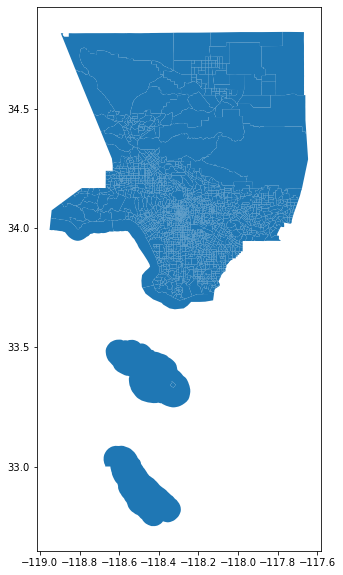

In [86]:
tracts.plot(figsize=(12,10))

In [87]:
tracts_HouseholdIncome=tracts.merge(HI,on="FIPS")

In [88]:
tracts_HouseholdIncome.head()

,FIPS,geometry,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Households,"Households: Less than $10,000","Households: $10,000 to $14,999","Households: $15,000 to $19,999","Households: $20,000 to $24,999","Households: $25,000 to $29,999","Households: $30,000 to $34,999","Households: $35,000 to $39,999","Households: $40,000 to $44,999","Households: $45,000 to $49,999","Households: $50,000 to $59,999","Households: $60,000 to $74,999","Households: $75,000 to $99,999","Households: $100,000 to $124,999","Households: $125,000 to $149,999","Households: $150,000 to $199,999","Households: $200,000 or More","Percent Households: Less than $10,000","Percent Households: $10,000 to $14,999","Percent Households: $15,000 to $19,999","Percent Households: $20,000 to $24,999","Percent Households: $25,000 to $29,999","Percent Households: $30,000 to $34,999","Percent Households: $35,000 to $39,999","Percent Households: $40,000 to $44,999","Percent Households: $45,000 to $49,999","Percent Households: $50,000 to $59,999","Percent Households: $60,000 to $74,999","Percent Households: $75,000 to $99,999","Percent Households: $100,000 to $124,999","Percent Households: $125,000 to $149,999","Percent Households: $150,000 to $199,999","Percent Households: $200,000 or More"
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,1596,110,97,70,76,123,96,54,78,88,64,126,277,91,93,109,44,6.89,6.08,4.39,4.76,7.71,6.02,3.38,4.89,5.51,4.01,7.89,17.36,5.70,5.83,6.83,2.76
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,1256,52,18,0,15,39,38,7,40,23,62,186,232,114,105,133,192,4.14,1.43,0.00,1.19,3.11,3.03,0.56,3.18,1.83,4.94,14.81,18.47,9.08,8.36,10.59,15.29
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,2321,285,140,335,69,223,145,61,95,220,128,147,225,96,67,14,71,12.28,6.03,14.43,2.97,9.61,6.25,2.63,4.09,9.48,5.51,6.33,9.69,4.14,2.89,0.60,3.06
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,1294,65,104,160,56,22,133,60,118,123,53,75,88,110,45,43,39,5.02,8.04,12.36,4.33,1.70,10.28,4.64,9.12,9.51,4.10,5.80,6.80,8.50,3.48,3.32,3.01
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,1435,75,14,69,36,29,23,18,123,49,87,80,200,146,107,195,184,5.23,0.98,4.81,2.51,2.02,1.60,1.25,8.57,3.41,6.06,5.57,13.94,10.17,7.46,13.59,12.82


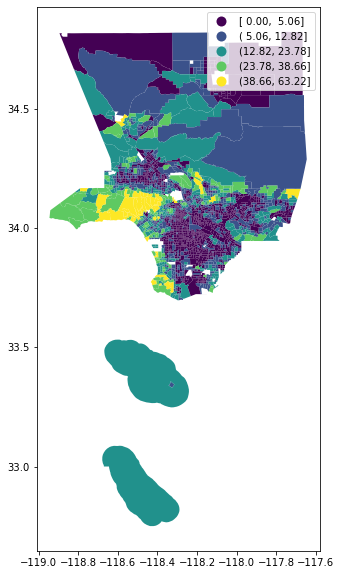

In [89]:
tracts_HouseholdIncome.plot(figsize=(12,10),
                 column='Percent Households: $200,000 or More',
                 legend=True, 
                 scheme='NaturalBreaks')

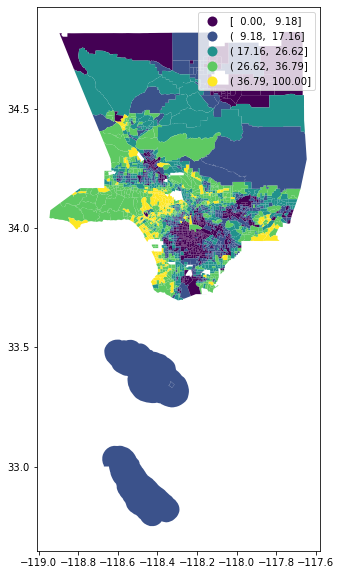

In [90]:
tracts_education.plot(figsize=(12,10),
                 column='PCT_Bachelors_Degree',
                 legend=True, 
                 scheme='NaturalBreaks')

#Now that we have created a cloropleth map for both bachelor's degrees attainment and household income, the maps can be compared. 

# Analysis and Conclusion

Within the cloropleth maps visible in the previous cells, we can see a higher concentration of bachelor's degrees more Northwest of the county, whereas towards Downtown LA, we can see a lower concentration of a population with bachelor's degrees. In comparison to the household income map, we can see a similar trend. Populations with a household income of 200,000 dollars or more are concentrated in areas such as Santa Monica, Brentwood, and the San Fernando Valley. Therefore, we can see a correlation between the level of educational attainment and annual income in Los Angeles County. As we continue to explore these variables as well as other variables, we expect to find more relationships between educational attainment, household income, white vs. non-white homeownership, crime rates, COVID rates, as well as other local metrics. 

# Members of Group 

1. Donna Heydar (Donna contributed to breaking down the educational attainment data in Los Angeles County. Both members discussed which datasets to use and discussed similarities between the two after breaking them down.)
2. Daniel Ruiz (Daniel contributed to breaking down the household income data in Los Angeles County. Both members discussed which datasets to use and discussed similarities between the two after breaking them down.)